# Import Library

In [173]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
import sklearn
import numpy as np
import sklearn.model_selection as ms

# Data Preparation

In [174]:
df = pd.read_csv('iris.data')
df.head()

,sepal_length,sepal_width,petal_length,petal_width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [175]:
df['class'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [176]:
#Mengubah tipe data object pada dataframe menjadi int dari 0 sampai n
le = LabelEncoder()
for col in df:
  if df['class'].dtype == "object":
    df['class'] = le.fit_transform(df['class'])

In [177]:
df['class'].unique()

array([0, 1, 2])

Label Spesies setelah encode
0 = Setosa
1 = Versicolor
2 = Virginica

# Data Visualization

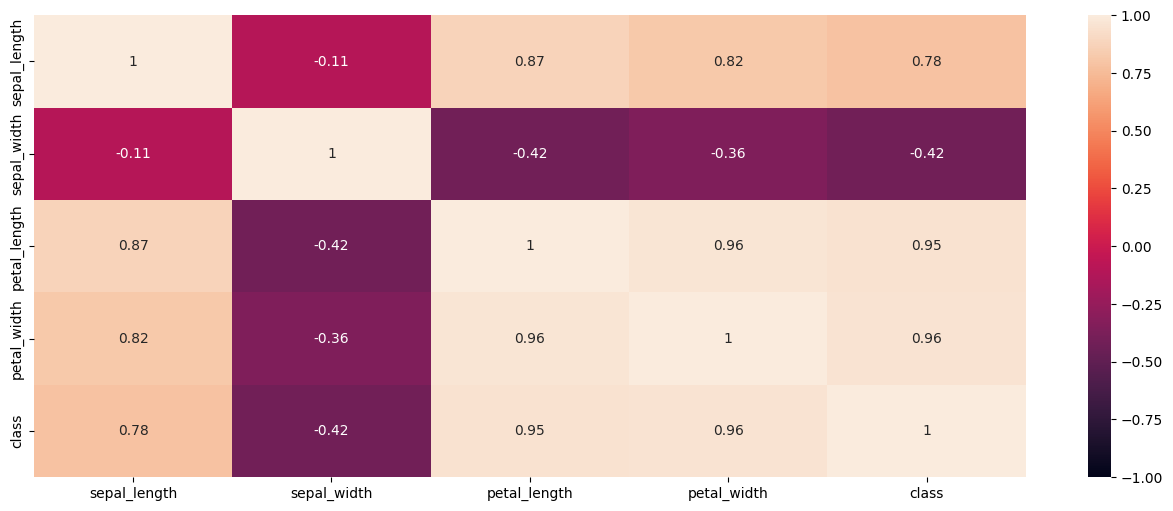

In [178]:
#Menampilkan Correlation antar data
plt.figure(figsize = (16, 6))
df_corr = sns.heatmap(df.corr(), vmin=-1, vmax=1, annot=True)

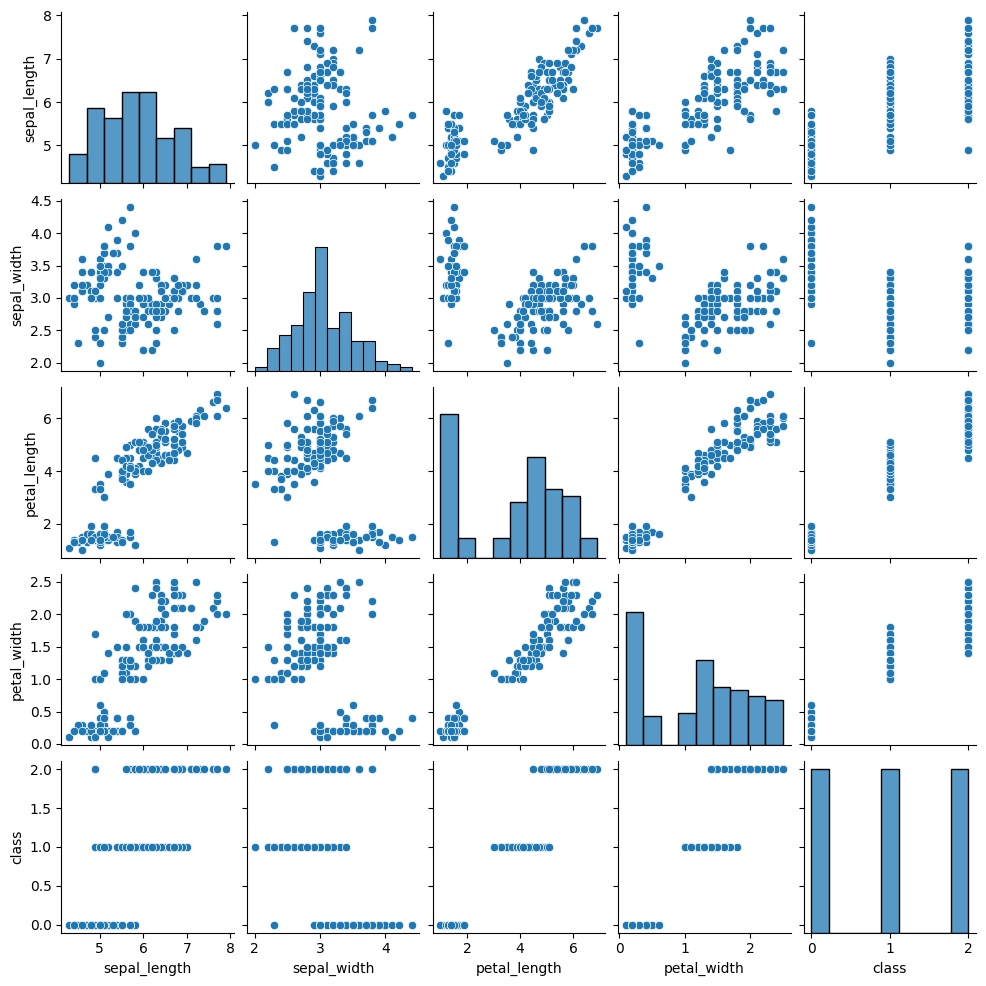

In [179]:
# Memvisualisasikan hubungan antar fitur menggunakan pair plot   
sns.pairplot(data = df, height = 2)  

In [180]:
dataset = df
dataset.head()

,sepal_length,sepal_width,petal_length,petal_width,class
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [181]:
#Menetapkan nilai untuk X dan Y
x = dataset[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']]
y = dataset['class']

In [182]:
#Memisahkan dataset
from sklearn.model_selection import train_test_split 

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 100)

# Linear Regression

In [183]:
#Fitting the Multiple Linear Regression model
from sklearn.linear_model import LinearRegression

mlr = LinearRegression()  
mlr.fit(x_train, y_train)

LinearRegression()

In [184]:
#Intercept and Coefficient
print("Intercept: ", mlr.intercept_)
print("Coefficients:")
list(zip(x, mlr.coef_))

Intercept:  0.14205909554958462
Coefficients:


[('sepal_length', -0.10306571323417899),
 ('sepal_width', -0.03814813336245798),
 ('petal_length', 0.22198422130391468),
 ('petal_width', 0.6130115678629073)]

In [185]:
y_pred_mlr= mlr.predict(x_test)

#Prediksi Nilai
print("Prediksi pada set tes: {}".format(y_pred_mlr))
     

Prediksi pada set tes: [ 1.90605969 -0.00458291  2.19088569 -0.0350863   1.58088865  1.99803906
 -0.15601247 -0.04402708  1.6820216   0.02758065 -0.03430498  1.94680748
  0.09740626 -0.09020604  1.90131897  1.14386928  0.94068738  1.48911519
  1.95495575  1.83500536  1.71323808  0.03398155  1.67201785  0.01335328
  1.00957196  1.65506734  1.18232776 -0.04422392  1.18548319  1.98406831
  0.91799534  1.1548201   1.46917738 -0.09502166 -0.02948936  1.27881085
 -0.05076188  1.16467926  2.07738085  2.04081048  0.06300564  1.18835698
  1.89287933  2.14928535 -0.08694462]


In [186]:
mlr_diff = pd.DataFrame({'Nilai Aktual': y_test, 'Nilai Prediksi': y_pred_mlr})
mlr_diff.head()
     

,Nilai Aktual,Nilai Prediksi
128,2,1.906060
11,0,-0.004583
118,2,2.190886
15,0,-0.035086
123,2,1.580889


<Axes: xlabel='class', ylabel='Density'>

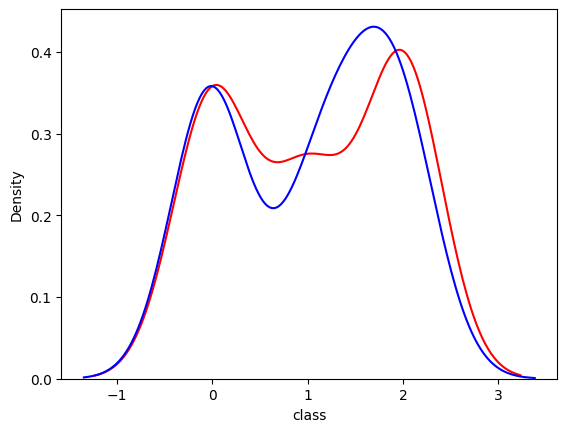

In [187]:
#Membandingkan nilai aktual dan prediksi untuk melihat seberapa baik kinerja model
ax1 = sns.kdeplot(y_test, color="r", label="Actual Value")
sns.kdeplot(y_pred_mlr, color="b", label="Fitted Values" , ax=ax1)
     

## RMSE, MSE dan R<sup>2</sup>

In [188]:
from sklearn import metrics

meanAbErr = metrics.mean_absolute_error(y_test, y_pred_mlr)
meanSqErr = metrics.mean_squared_error(y_test, y_pred_mlr)
rootMeanSqErr = np.sqrt(metrics.mean_squared_error(y_test, y_pred_mlr))

print('R squared: {:.2f}'.format(mlr.score(x,y)*100))
print('Mean Absolute Error:', meanAbErr)
print('Mean Square Error:', meanSqErr)
print('Root Mean Square Error:', rootMeanSqErr)
print('Accuracy: {:.2f}'.format(mlr.score(x,y)*100) + "%")


R squared: 93.03
Mean Absolute Error: 0.1358035104856328
Mean Square Error: 0.03494837043164172
Root Mean Square Error: 0.18694483258876593
Accuracy: 93.03%


# Classification Method

## Decision Tree

In [189]:
from sklearn import tree

clf = tree.DecisionTreeClassifier()
clf = clf.fit(x_train, y_train)
     

In [190]:
y_pred_clf= clf.predict(x_test)

#Prediksi nilai untuk model classification tree
print("Prediksi pada set tes: {}".format(y_pred_clf))
     

Prediksi pada set tes: [2 0 2 0 2 2 0 0 2 0 0 2 0 0 2 1 1 2 2 2 2 0 2 0 1 2 1 0 1 2 1 1 1 0 0 1 0
 1 2 2 0 1 2 2 0]


In [191]:
clf_diff = pd.DataFrame({'Nilai Aktual': y_test, 'Nilai Prediksi': y_pred_clf})
clf_diff.head()

,Nilai Aktual,Nilai Prediksi
128,2,2
11,0,0
118,2,2
15,0,0
123,2,2


In [192]:
from sklearn.metrics import confusion_matrix, accuracy_score

print("Accuracy: {:.2f}%".format(accuracy_score(y_test, y_pred_clf)*100))

conmat = confusion_matrix(y_test, y_pred_clf)
val = np.mat(conmat) 

classnames = list(set(y_train))

df_cm = pd.DataFrame(

        val, index=classnames, columns=classnames, 

    )

print(df_cm)

Accuracy: 95.56%
    0   1   2
0  16   0   0
1   0  10   1
2   0   1  17


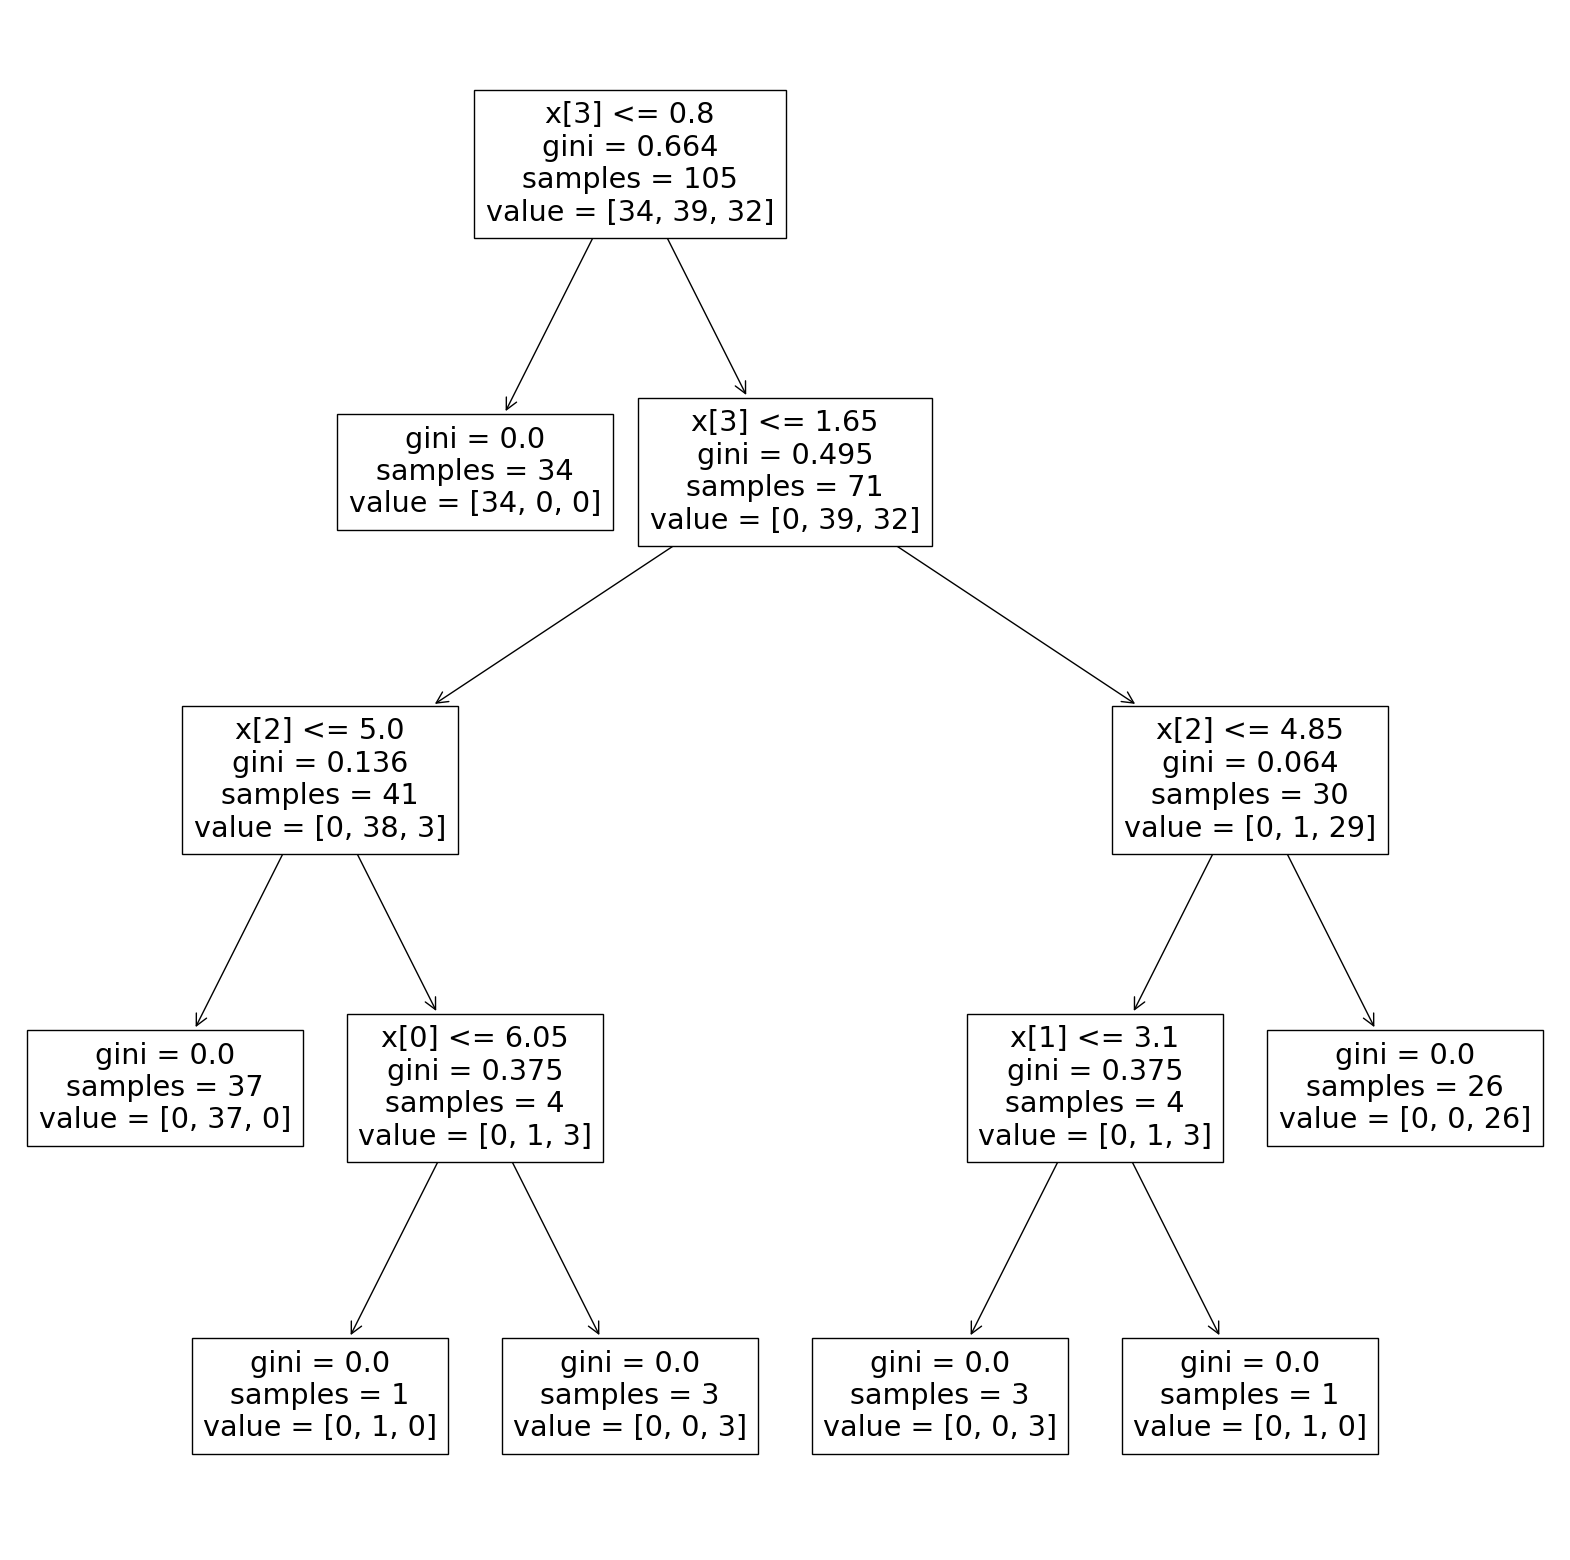

In [193]:
## Evaluasi Model ##

from sklearn import tree
plt.figure(figsize=(20,20))
tree.plot_tree(clf)
plt.show()

## KNN

In [194]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

In [195]:
knn_method = KNeighborsClassifier()
knn_method.fit(x_train, y_train)
y_pred_knn = knn_method.predict(x_test)
score_knn = metrics.accuracy_score(y_pred_knn, y_test)
print('Akurasi Prediksi method K-NN : ',round(score_knn,8), ' atau ',round(score_knn*100,2),'%', sep='')

Akurasi Prediksi method K-NN : 0.97777778 atau 97.78%


In [196]:
## Evaluasi model ##
k = 10
mean_acc = []
std_acc = []

for i in range(1,k):
    knn_method = KNeighborsClassifier(n_neighbors = i)
    knn_method.fit(x_train, y_train)
    y_pred_knn = knn_method.predict(x_test)
    mean_acc.append(metrics.accuracy_score(y_pred_knn, y_test))
    std_acc.append(np.std(y_pred_knn==y_test)/np.sqrt(y_pred_knn.shape[0]))
    
mean_acc

[0.9777777777777777,
 0.9777777777777777,
 0.9777777777777777,
 0.9555555555555556,
 0.9777777777777777,
 0.9777777777777777,
 1.0,
 0.9777777777777777,
 1.0]

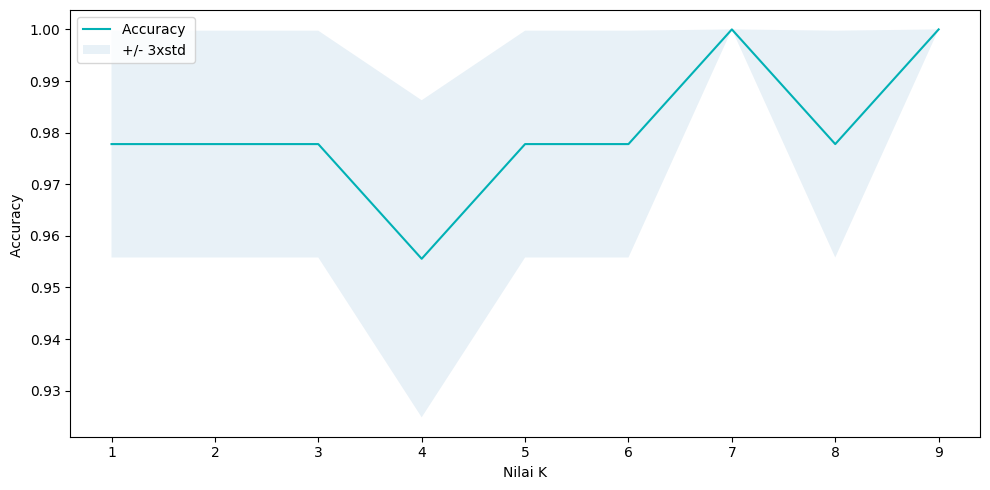

In [197]:
## K-NN ##
plt.figure(figsize = (10,5))
plt.plot(range(1,k),mean_acc, color='#01b1b5')
plt.fill_between(range(1,k),
                np.array(mean_acc) - 1 * np.array(std_acc),
                mean_acc + 1 * np.array(std_acc), 
                alpha=0.10)
plt.legend(('Accuracy ', '+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Nilai K')
plt.tight_layout()
plt.show()

In [198]:
print("Nilai Akurasi terbaik ada pada ", 
      round(np.array(mean_acc).max()*100,2), 
      "% dengan k = ", np.array(mean_acc).argmax()+1, sep='')

Nilai Akurasi terbaik ada pada 100.0% dengan k = 7


## Naive Bayes

In [199]:
from sklearn import naive_bayes

In [200]:
bayes_method = naive_bayes.BernoulliNB()
bayes_method.fit(x_train, y_train)
y_pred_bayes = bayes_method.predict(x_test)
score_bayes = metrics.accuracy_score(y_pred_bayes, y_test)
print('Akurasi Prediksi Bayes : ',round(score_bayes,8), ' atau ',round(score_bayes*100,2),'%', sep='')

Akurasi Prediksi Bayes : 0.24444444 atau 24.44%


# Confusion Matrix

## Decision Tree

In [201]:
def get_conf_matriks(y_actual, y_predic, cmap = None, title='Tidak ada', ):
    confusion_matrix = metrics.confusion_matrix(y_actual, y_predic)
    ax = sns.heatmap(confusion_matrix, annot=True, fmt='g', cmap = cmap)
    ax.set_xlabel("Prediction", fontsize=14, labelpad=20)
    ax.set_ylabel("Actual", fontsize=14, labelpad=20)
    ax.set_title(title, fontsize=14, pad=20)
    plt.show()
    
    conf_matrix_value = (confusion_matrix[0,0] + confusion_matrix[1,1] + confusion_matrix[2,2]) / sum(sum(confusion_matrix))
    print("Hasil Confusion Matriks :" , round(conf_matrix_value*100,2), "%", sep='')

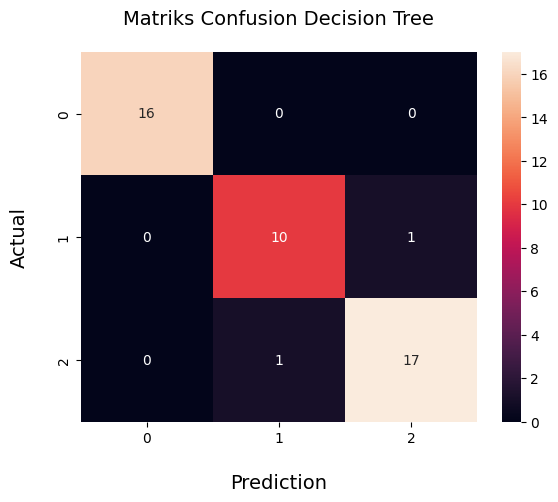

Hasil Confusion Matriks :95.56%


In [202]:
get_conf_matriks(y_test, y_pred_clf, title='Matriks Confusion Decision Tree')

## KNN

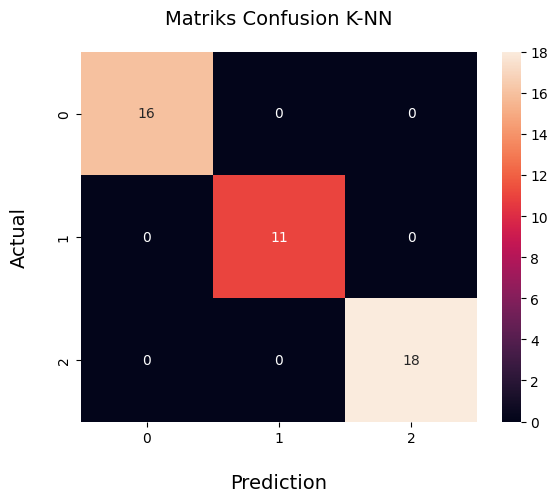

Hasil Confusion Matriks :100.0%


In [203]:
get_conf_matriks(y_test, y_pred_knn, title='Matriks Confusion K-NN')

## Naive Bayes

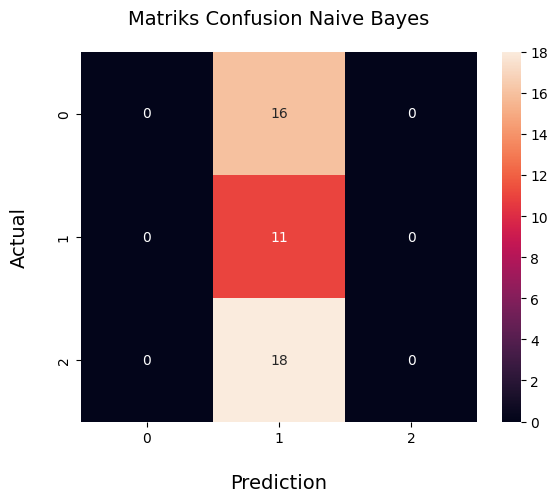

Hasil Confusion Matriks :24.44%


In [204]:
get_conf_matriks(y_test, y_pred_bayes, title='Matriks Confusion Naive Bayes')

# Kesimpulan Klasifikasi

Dari ketiga metode yang digunakan yaitu K-NN, Decision Tree, dan Naive Bayes untuk melakukan klasifikasi pada data set iris guna membagi dataset kedalam tiga spesies bunga tersebut, dengan melihat Akurasi dan hasil dari Confusion Matriks dari ketiga metode. Maka Metode yang terbaik untuk melakukan klasifikasi pada data set yaitu KNN dengan nilai akurasi 100%. atau dapat di lihat pada Confusion Matriks KNN berikut:

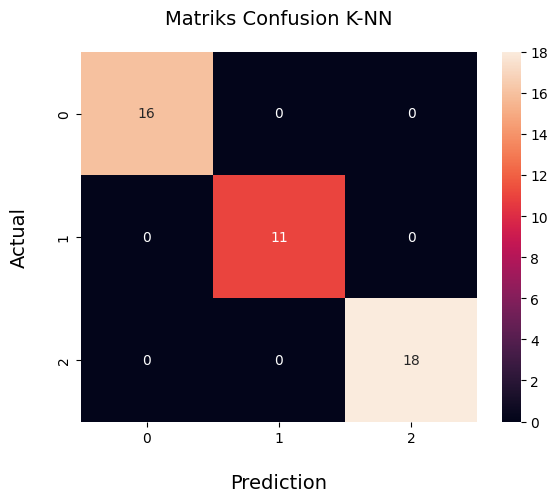

Hasil Confusion Matriks :100.0%


In [205]:
get_conf_matriks(y_test, y_pred_knn, title='Matriks Confusion K-NN')

Sedangkan yang memiliki akurasi terburuk adalah metode Naive Bayes yang menggunakan model Bernoulli hal ini dikarenakan data yang digunakan berupa data angka dan continous sedangkan Bernoulli lebih tepatnya digunakan untuk klasifikasi teks untuk mengecek suatu event terjadi atau tidak (memberi jawaban berupa iya atau tidak)

# K-Means

In [206]:
from sklearn.cluster import KMeans
import seaborn as sns
import matplotlib.pyplot as plt

In [207]:
## mencari kelompok terbaik ##
wcss = []
for i in range(1,11):
    method_kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42, n_init=10)
    method_kmeans.fit(x_train, y_train)
    wcss.append(method_kmeans.inertia_)

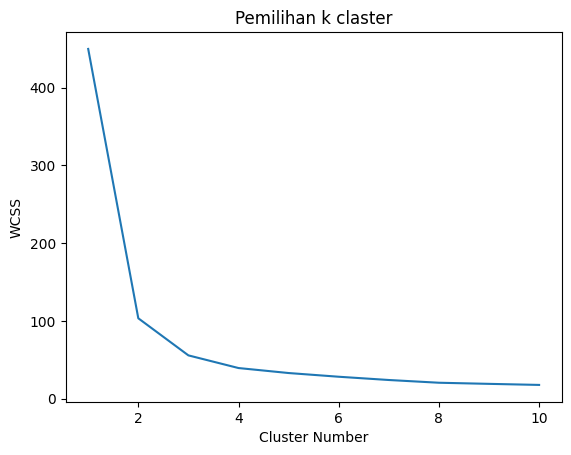

In [208]:
plt.plot(range(1,11), wcss)
plt.title('Pemilihan k claster')
plt.xlabel('Cluster Number')
plt.ylabel('WCSS')
plt.show()

In [209]:
method_kmeans = KMeans(n_clusters=3, init = 'k-means++', random_state = 42, n_init=10)
y_pred_kmeans = method_kmeans.fit_predict(x_test)
y_pred_kmeans

array([2, 0, 2, 0, 1, 2, 0, 0, 2, 0, 0, 2, 0, 0, 2, 1, 1, 1, 2, 2, 2, 0,
       1, 0, 1, 1, 1, 0, 1, 2, 1, 1, 1, 0, 0, 1, 0, 1, 2, 1, 0, 1, 2, 2,
       0], dtype=int32)

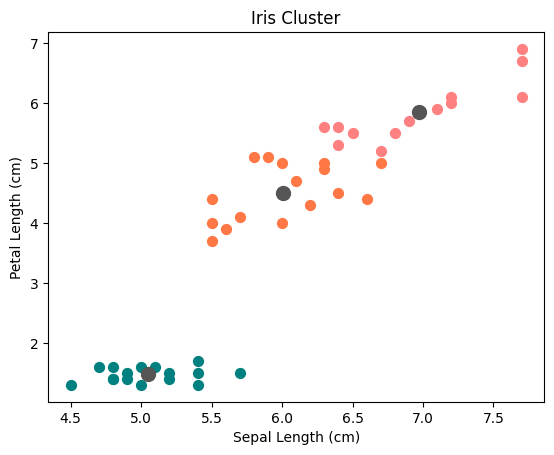

In [210]:
plt.scatter(x_test[y_pred_kmeans == 0]["sepal_length"], x_test[y_pred_kmeans == 0]["petal_length"], s = 50, c = '#008080', label = 'Cluster 1')
plt.scatter(x_test[y_pred_kmeans == 1]["sepal_length"], x_test[y_pred_kmeans == 1]["petal_length"], s = 50, c = '#FF7744', label = 'Cluster 2')
plt.scatter(x_test[y_pred_kmeans == 2]["sepal_length"], x_test[y_pred_kmeans == 2]["petal_length"], s = 50, c = '#FF8080', label = 'Cluster 3')
plt.scatter(method_kmeans.cluster_centers_[:, 0], method_kmeans.cluster_centers_[:, 2], s = 100, c = '#555555', label = 'Centroids')
plt.title('Iris Cluster')
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Petal Length (cm)')
plt.show()

In [211]:
kmeans_diff = pd.DataFrame({'Nilai Aktual': y_test, 'Nilai Prediksi': y_pred_kmeans})
kmeans_diff.head()

,Nilai Aktual,Nilai Prediksi
128,2,2
11,0,0
118,2,2
15,0,0
123,2,1


<Axes: xlabel='class', ylabel='Density'>

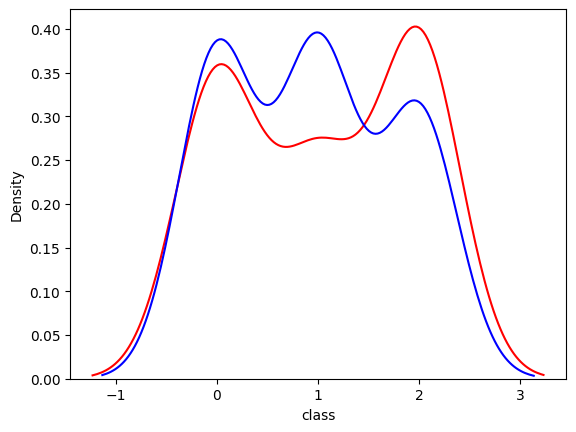

In [212]:
#Membandingkan nilai aktual dan prediksi untuk melihat seberapa baik kinerja model

ax1 = sns.kdeplot(y_test, color="r", label="Actual Value")
sns.kdeplot(y_pred_kmeans, color="b", label="Fitted Values" , ax=ax1)

In [213]:
print("Accuracy: {:.2f}%".format(accuracy_score(y_test, y_pred_kmeans)*100))

conmat = confusion_matrix(y_test, y_pred_kmeans)
val = np.mat(conmat) 

classnames = list(set(y_train))

df_cm = pd.DataFrame(

        val, index=classnames, columns=classnames, 

    )

print(df_cm) 


Accuracy: 88.89%
    0   1   2
0  16   0   0
1   0  11   0
2   0   5  13


# Kesimpulan

In [214]:
def get_conf_matriks_accuracy(y_actual, y_predic, cmap = None, title='Tidak ada', ):
    confusion_matrix = metrics.confusion_matrix(y_actual, y_predic)
    
    conf_matrix_value = (confusion_matrix[0,0] + confusion_matrix[1,1] + confusion_matrix[2,2]) / sum(sum(confusion_matrix))
    print("Akurasi " + title + " : " , round(conf_matrix_value*100,2), "%", sep='')

In [215]:
print("Perbandingan Akurasi pada dataset iris :")
get_conf_matriks_accuracy(y_test, y_pred_clf, title='Decision Tree')
get_conf_matriks_accuracy(y_test, y_pred_knn, title='K-NN')
get_conf_matriks_accuracy(y_test, y_pred_bayes, title='Naive Bayes')

print(f"Akurasi Linear Regresi (Nilai R-square) : {mlr.score(x,y)*100:.2f}%")
print(f"Akurasi Classification Tree : {accuracy_score(y_test, y_pred_clf)*100:.2f}%")
print(f"Akurasi K-Means Clustering : {accuracy_score(y_test, y_pred_kmeans)*100:.2f}%")


Perbandingan Akurasi pada dataset iris :
Akurasi Decision Tree : 95.56%
Akurasi K-NN : 100.0%
Akurasi Naive Bayes : 24.44%
Akurasi Linear Regresi (Nilai R-square) : 93.03%
Akurasi Classification Tree : 95.56%
Akurasi K-Means Clustering : 88.89%


Maka dapat disimpulkan metode terbaik untuk dataset ini ialah Method K-NN (K-Nearest Neighbors) dengan akurasi 100%